In [1]:
import pandas as pd
import numpy as np

In [2]:
#korean is encoded in utf-8
cctv_seoul = pd.read_csv('01.CCTV_in_Seoul.csv', encoding='utf-8')
#shows the first 5 rows
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
#returns the columns in the csv file loaded
cctv_seoul.columns[0]

'기관명'

In [4]:
#this renames the first column to '구별'. inplace=True means to apply the changes
cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace=True)
cctv_seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
pop_seoul = pd.read_excel('01.population_in_Seoul.xls')
pop_seoul

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [7]:
#header=2 means read from the second row, parse_cols means read the specified columns only
pop_seoul = pd.read_excel('01.population_in_Seoul.xls', 
                          header = 2,
                          parse_cols = 'B, D, G, J, N',
                          encoding='utf-8')

/Users/jonghobaeck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


In [8]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
#see the columns
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [10]:
#however, these changes don't change the text in the original file, because we made an instanceo out of the file
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_seoul.values

array([['합계', 10197604.0, 9926968.0, 270636.0, 1321458.0],
       ['종로구', 162820.0, 153589.0, 9231.0, 25425.0],
       ['중구', 133240.0, 124312.0, 8928.0, 20764.0],
       ['용산구', 244203.0, 229456.0, 14747.0, 36231.0],
       ['성동구', 311244.0, 303380.0, 7864.0, 39997.0],
       ['광진구', 372164.0, 357211.0, 14953.0, 42214.0],
       ['동대문구', 369496.0, 354079.0, 15417.0, 54173.0],
       ['중랑구', 414503.0, 409882.0, 4621.0, 56774.0],
       ['성북구', 461260.0, 449773.0, 11487.0, 64692.0],
       ['강북구', 330192.0, 326686.0, 3506.0, 54813.0],
       ['도봉구', 348646.0, 346629.0, 2017.0, 51312.0],
       ['노원구', 569384.0, 565565.0, 3819.0, 71941.0],
       ['은평구', 494388.0, 489943.0, 4445.0, 72334.0],
       ['서대문구', 327163.0, 314982.0, 12181.0, 48161.0],
       ['마포구', 389649.0, 378566.0, 11083.0, 48765.0],
       ['양천구', 479978.0, 475949.0, 4029.0, 52975.0],
       ['강서구', 603772.0, 597248.0, 6524.0, 72548.0],
       ['구로구', 447874.0, 416487.0, 31387.0, 56833.0],
       ['금천구', 255082.0, 236353.

# A Bit Into Numpy

In [12]:
#nan means Not A Number
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
#you can set the basic dates, and use 'periods' to set the ranges
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036
2013-01-04,-1.086588,-0.385598,0.995200,0.153263
2013-01-05,-0.264853,0.836877,-0.929775,0.426327
2013-01-06,0.541925,-0.443428,-0.527943,-0.429930


In [15]:
#this orders the dataframe by given data.
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,-0.264853,0.836877,-0.929775,0.426327
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-04,-1.086588,-0.385598,0.995200,0.153263
2013-01-06,0.541925,-0.443428,-0.527943,-0.429930


In [16]:
#shows results in column C df['C']
df[['C', 'D']]

,C,D
2013-01-01,-0.159090,0.403457
2013-01-02,-1.284797,-0.166078
2013-01-03,1.443994,0.727036
2013-01-04,0.995200,0.153263
2013-01-05,-0.929775,0.426327
2013-01-06,-0.527943,-0.429930


In [17]:
#you can select return specific rows as well
df[0:3]

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036


In [18]:
#or you can do this
df['2013-01-02':'20130104']

,A,B,C,D
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036
2013-01-04,-1.086588,-0.385598,0.995200,0.153263


In [19]:
#loc is a slicing option
df.loc[dates[0:2]]

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078


In [20]:
df.loc[:, ['A', 'B']]
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.743250,0.399384
2013-01-03,-1.613869,0.395443
2013-01-04,-1.086588,-0.385598


In [21]:
df.loc['20130102', ['A', 'B']]

A   -0.743250
B    0.399384
Name: 2013-01-02 00:00:00, dtype: float64

In [22]:
df

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036
2013-01-04,-1.086588,-0.385598,0.995200,0.153263
2013-01-05,-0.264853,0.836877,-0.929775,0.426327
2013-01-06,0.541925,-0.443428,-0.527943,-0.429930


## Using iloc

In [23]:
#using only number in iloc returns the specified row
df.iloc[3]

A   -1.086588
B   -0.385598
C    0.995200
D    0.153263
Name: 2013-01-04 00:00:00, dtype: float64

In [24]:
#the first bracket refers to row specification, and the second bracket refers to the column specification
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.086588,-0.385598
2013-01-05,-0.264853,0.836877


In [25]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.743250,-1.284797
2013-01-03,-1.613869,1.443994
2013-01-05,-0.264853,-0.929775


In [26]:
# :refers to whole
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036


In [27]:
#this shows all the values in column A
df['A']

2013-01-01   -0.826448
2013-01-02   -0.743250
2013-01-03   -1.613869
2013-01-04   -1.086588
2013-01-05   -0.264853
2013-01-06    0.541925
Freq: D, Name: A, dtype: float64

In [28]:
#this retrieves all values of dates whose values in A is greater than 0
df[df.A > 0]

,A,B,C,D
2013-01-06,0.541925,-0.443428,-0.527943,-0.42993


In [29]:
# this retrieves all data for which the values are greater than 0.
# if not greater than 0, they will be given NaN.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.403457
2013-01-02,NaN,0.399384,NaN,NaN
2013-01-03,NaN,0.395443,1.443994,0.727036
2013-01-04,NaN,NaN,0.995200,0.153263
2013-01-05,NaN,0.836877,NaN,0.426327
2013-01-06,0.541925,NaN,NaN,NaN


In [30]:
#copy method
df2 = df.copy()

In [31]:
# Adding a new column to the DataFrame
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457,one
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078,one
2013-01-03,-1.613869,0.395443,1.443994,0.727036,two
2013-01-04,-1.086588,-0.385598,0.995200,0.153263,three
2013-01-05,-0.264853,0.836877,-0.929775,0.426327,four
2013-01-06,0.541925,-0.443428,-0.527943,-0.429930,three


In [32]:
#check if two or four are in the E column
df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [33]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.613869,0.395443,1.443994,0.727036,two
2013-01-05,-0.264853,0.836877,-0.929775,0.426327,four


In [34]:
#Adding column E in df2 doesn't affect the original df
df

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-0.743250,0.399384,-1.284797,-0.166078
2013-01-03,-1.613869,0.395443,1.443994,0.727036
2013-01-04,-1.086588,-0.385598,0.995200,0.153263
2013-01-05,-0.264853,0.836877,-0.929775,0.426327
2013-01-06,0.541925,-0.443428,-0.527943,-0.429930


In [35]:
#use cumsum from numpy to see cumulative data
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.826448,-0.307500,-0.159090,0.403457
2013-01-02,-1.569698,0.091885,-1.443886,0.237379
2013-01-03,-3.183567,0.487328,0.000107,0.964415
2013-01-04,-4.270155,0.101730,0.995307,1.117678
2013-01-05,-4.535008,0.938607,0.065532,1.544004
2013-01-06,-3.993083,0.495179,-0.462411,1.114074


In [36]:
df.apply(lambda x: x.max() - x.min())

A    2.155794
B    1.280305
C    2.728790
D    1.156966
dtype: float64

In [37]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [38]:
cctv_seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [39]:
type(df.A)

pandas.core.series.Series

## 1-4 pandas를 이용해서 CCTV와 인구 현황 데이터 파악하기

In [40]:
cctv_seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [41]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년']) \
                        / cctv_seoul['2013년도 이전'] * 100

In [42]:
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [43]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [44]:
# drop the first row in pop_seoul 
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [45]:
#find unique values in 구별
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [46]:
#find index of the null value
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [47]:
#drop null value
pop_seoul.drop([26], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [48]:
# adding a new column for foreigner ratio and aged-population ratio
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [49]:
# sort by 인구수
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [50]:
# sort by number of foreigners
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [51]:
# sort by foreigner ratio
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [52]:
# sort by over-aged
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [53]:
# sort by over-aged ratio
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

In [54]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index = [0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index = [4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index = [8, 9, 10, 11])

In [55]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [56]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [57]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [58]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [59]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [60]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [61]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index = [2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [62]:
# axis=1 means concatenate with column by column
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [63]:
# this will only concatenate with respect to the overlapping indices
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [64]:
# this method will only concatenate with respect to the indices from df1
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [65]:
# this will concatenate row by row, with INCREMENTED indices.
result = pd.concat([df1, df4], ignore_index=True)
result

/Users/jonghobaeck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### Another Example

In [66]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B4', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D4', 'D2', 'D3']})

In [67]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B4
2,K2,A2,B2
3,K3,A3,B3


In [68]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D4
2,K2,C2,D2
3,K3,C3,D3


In [69]:
# merge via 'key' but this will only merge with values with overlapping keys
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [70]:
# this will merge with keys from left
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [71]:
# this will merge with keys from right
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D4


In [72]:
#very much like outer join
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D4


In [73]:
# 교집합처럼 inner join
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [74]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [75]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


## 1-6 CCTV 데이터와 인구 현황 데이터 합치고 분석하기

In [76]:
data_result = pd.merge(pop_seoul, cctv_seoul, on='구별')
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621


In [77]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,53.228621


In [78]:
# setting index to '구별'
data_result.set_index('구별', inplace=True)
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,248.922414
중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,147.699758
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,53.216374
성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,81.780822
광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,53.228621


In [79]:
#change the order of DataFrame columns
data_result = data_result[['소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1002,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,1062,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [80]:
# Use corrcoef from numpy to find correlation coefficients between two variables(categories/columns within the table)
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [81]:
# corrcoef between 외국인비율 and 소계
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [82]:
# corrcoef between 인구수 and 소계
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [83]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


##### Takeaway insight
위의 결과로 보아 소계가 높은 곳일 수록 인구수가 높은것 같다.

## 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline 
#matplotlib를 사용하여 시각화한 결과를 jupyter notebook에서 보게 해주는 명령어

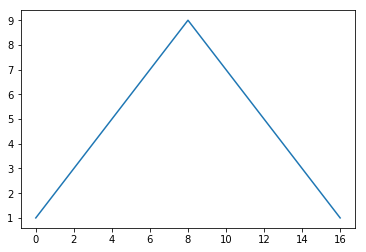

In [91]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1])
plt.show()

In [92]:
t = np.arange(0,12,0.01)
y = np.sin(t)

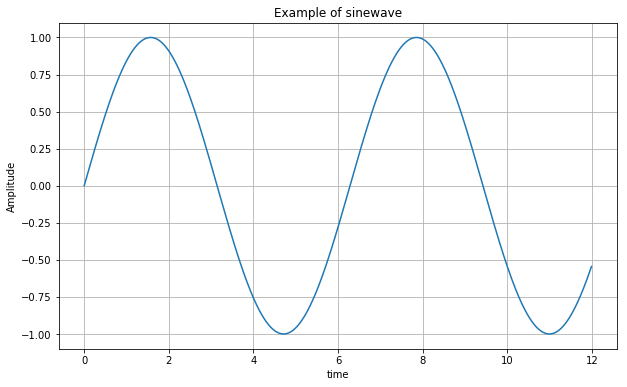

In [95]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

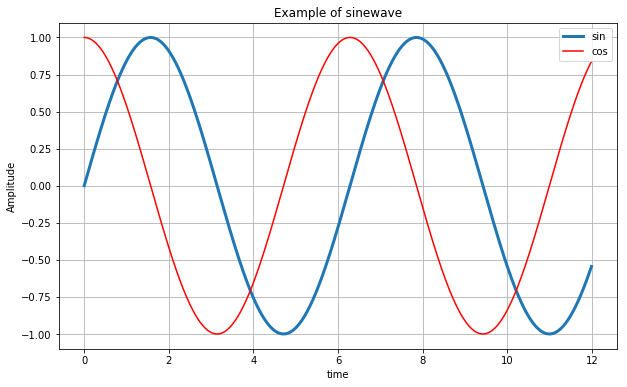

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') #lw is linewidth
plt.plot(t, np.cos(t), 'r', label='cos') #'r' is color
plt.grid()
plt.legend() #show legend
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

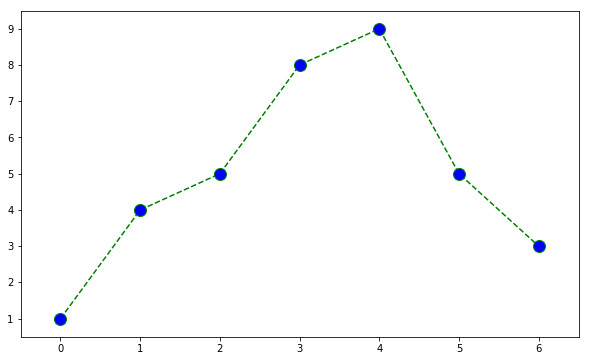

In [123]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor = 'blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [124]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

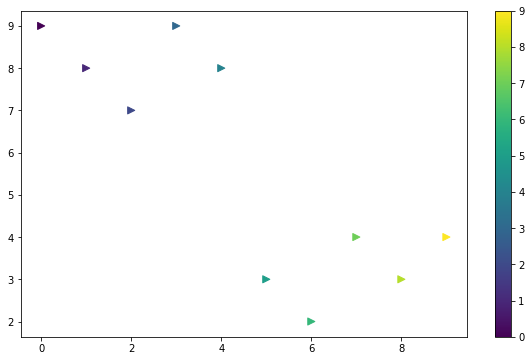

In [133]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [139]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

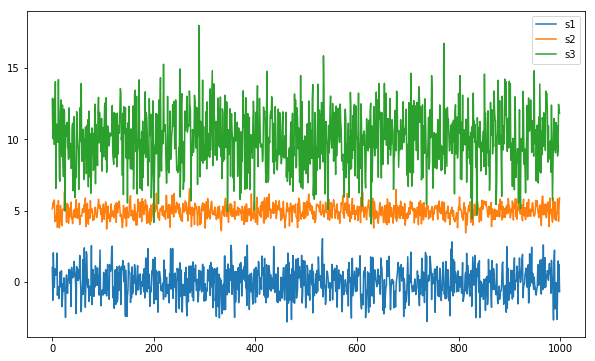

In [141]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

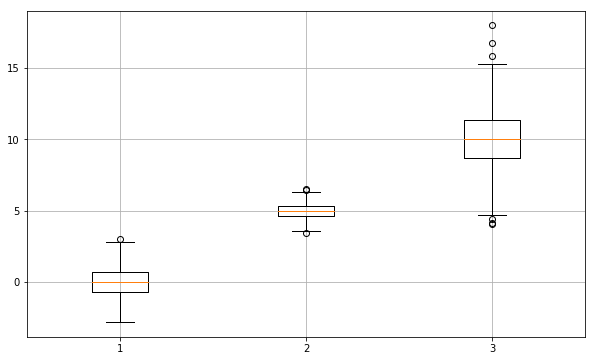

In [144]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()